# Банки — Анализ оттока клиентов

### Задача
Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка.
- Проведите исследовательский анализ данных, определите все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравните портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д).
- Сформулируйте и проверьте статистические гипотезы.
  - Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
  - Сформулируйте и проверьте статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование.
- Объединяя признаки отточности, сформируйте сегменты, отберите из них лучшие и дайте по ним рекомендации.

### Описание данных
Датасет `bank_scrooge.csv` содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.<br>
Колонки:
- `userid` — идентификатор пользователя
- `score` — баллы кредитного скоринга
- `City` — город
- `Gender` — пол
- `Age` — возраст
- `equity` — количество баллов собственности
- `Balance` — баланс на счёте
- `Products` — количество продуктов, которыми пользуется клиент
- `CreditCard` — есть ли кредитная карта
- `Loyalty / last_activity` — активный клиент
- `estimated_salary` — заработная плата клиента
- `Churn` — ушёл или нет

### Ход исследования
Данные получу из файла `bank_scrooge.csv`. О качестве данных ничего неизвестно, поэтому перед тем как приступить к ходу исследования, понадобится обзор данных.

Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Потом создам необходимые столбцы и приступлю к проведению исследовательского анализа.

Таким образом, исследование пройдёт в шесть этапов:
1. Загрузка данных и изучение общей информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Анализ отточных клиентов и их сегментация
5. Проверка гипотез
6. Выводы и рекомендации

### 1. Загрузка данных и изучение общей информации

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth

import warnings as wr
wr.filterwarnings('ignore')

import phik
from phik.report import plot_correlation_matrix
from phik import report

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')
except:
    data = pd.read_csv('C:/Users/salpa/Downloads/bank_scrooge.csv')

In [4]:
data.sample(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
8446,118587,921.00,Ростов,М,49.00,0,NaN,1,0,1,147477.95,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
6162,153089,909.00,Ярославль,М,54.00,5,884462.90,3,0,1,874974.77,1
9148,227887,885.00,Ярославль,Ж,65.00,4,527805.34,2,1,0,82789.86,0
7983,154450,863.00,Ярославль,М,53.00,3,985855.01,1,1,0,42315.57,0
1070,211100,894.00,Рыбинск,М,38.00,5,537515.53,4,0,1,68893.74,0
8875,130395,929.00,Ярославль,Ж,60.00,0,NaN,1,1,1,469934.64,0
9542,176627,985.00,Ярославль,Ж,48.00,4,1041512.69,3,0,0,66154.15,0
4151,205370,793.00,Рыбинск,Ж,30.00,1,212817.83,2,0,0,45768.56,0
3846,172870,868.00,Рыбинск,Ж,42.00,5,546456.02,4,1,1,192022.20,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe()

,USERID,score,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
count,10000.00,10000.00,9974.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.73,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18
std,33708.24,65.45,12.18,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


- Всего в датафрейме 10000 строк и 12 колонок. Сразу видно некорректные заголовки, а также пропуски в двух колонках. Аномалий, которые точно по моему мнению аномалии - не замечено. Есть баланс на почти 120 миллионов, но в это можно поверить. Есть зарплата 2500, что тоже не выглядит фантастикой. Всё остальное в пределах нормы: кредитный скоринг от 642 до 1000, возраст от 18 до 86, девять баллов недвижимости, пять продуктов, кредитная карта 0 или 1, активность 0 или 1, отток 0 или 1.

### 2. Предобработка данных

Приводим название столбцов к нижнему регистру.

In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')

Смотрим в каких столбцах есть пропуски.

In [8]:
data.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Пропусков в столбце с возрастом 26 штук, они нам не сделают погоды, можно удалить. И даже нужно, иначе не поменять тип данных в этом столбце.

In [9]:
data.dropna(subset=['age'], inplace=True)

Пропусков в балансе почти четверть, посмотрим на них подробнее.<br>
Создадим отдельный датафрейм с пропусками в балансе.

In [10]:
balance_null = data.query('balance.isna()')

Посмотрим на распределение пропущенного баланса по категориям.

In [11]:
for column in ['city', 'gender', 'equity', 'products','credit_card','last_activity', 'churn']:
    print(column)
    print(round(balance_null[column].value_counts(normalize=True),2))
    print()

city
Ярославль   0.64
Рыбинск     0.26
Ростов      0.10
Name: city, dtype: float64

gender
М   0.56
Ж   0.44
Name: gender, dtype: float64

equity
0   0.95
1   0.05
3   0.00
Name: equity, dtype: float64

products
1   0.85
2   0.14
3   0.01
0   0.00
Name: products, dtype: float64

credit_card
1   0.82
0   0.18
Name: credit_card, dtype: float64

last_activity
1   0.55
0   0.45
Name: last_activity, dtype: float64

churn
0   0.99
1   0.01
Name: churn, dtype: float64



Клиенты с пропущенным балансом в 64% из Ярославля, на 12% больше шансов что это мужчина, у них с вероятностью 95% нулевое количество баллов собственности, в 85% один банковский продукт, 82% из них имеют кредитную карту, чуть больше активны и 99% из них не ушли из банка.

Построим гистаграммы по остальным категориям.

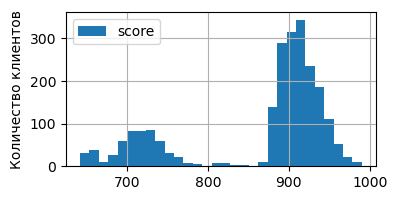

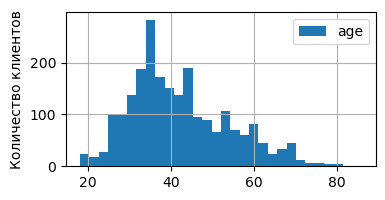

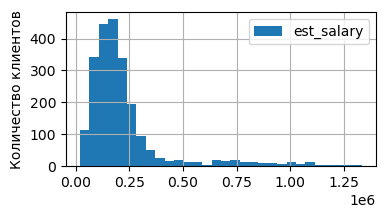

In [12]:
for column in ['score', 'age', 'est_salary']:
    balance_null.plot(y = column, kind = 'hist', bins = 30, figsize=(4,2), grid = True)
    plt.ylabel('Количество клиентов')

У клиентов с пропущенным балансом кредитный скоринг как правило больше 870 баллов, у них нормальное возрастное распределение и зарплата.

- Зависимости от какой-либо отдельной категории у клиентов с пропущенным балансом не обнаружено. Заполнить эти пропуски логически вариантов нет. Оставляем как есть.

Меняем тип данных в столбцах на нужные.

In [13]:
data['score'] = data['score'].astype(int)
data['age'] = data['age'].astype(int)

Проверяем датасет на дубликаты.

In [14]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [15]:
data['userid'].duplicated().sum()

50

Видимо, какая-то ошибка в выгрузке: 50 дубликатов идентификатора пользователя, которые должны быть уникальны. Процент мизерный, тоже удаляем без сожаления.

In [16]:
data = data.drop_duplicates(subset=['userid'])

Проверяем столбцы с категориальными данными на уникальность.

In [17]:
data['city'].unique()

array(['Рыбинск', 'Ярославль', 'Ростов'], dtype=object)

In [18]:
data['gender'].unique()

array(['Ж', 'М'], dtype=object)

Здесь всё верно.

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9924 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9924 non-null   int64  
 1   score          9924 non-null   int32  
 2   city           9924 non-null   object 
 3   gender         9924 non-null   object 
 4   age            9924 non-null   int32  
 5   equity         9924 non-null   int64  
 6   balance        7664 non-null   float64
 7   products       9924 non-null   int64  
 8   credit_card    9924 non-null   int64  
 9   last_activity  9924 non-null   int64  
 10  est_salary     9924 non-null   float64
 11  churn          9924 non-null   int64  
dtypes: float64(2), int32(2), int64(6), object(2)
memory usage: 930.4+ KB


- Мы исправили регистр в названии столбцов, проверили и кое-где убрали пропуски, поменяли тип данных в нужных колонках и убрали дубликаты.

### 3. Исследовательский анализ данных

Изучим клиентов банка и представленные по ним данные.

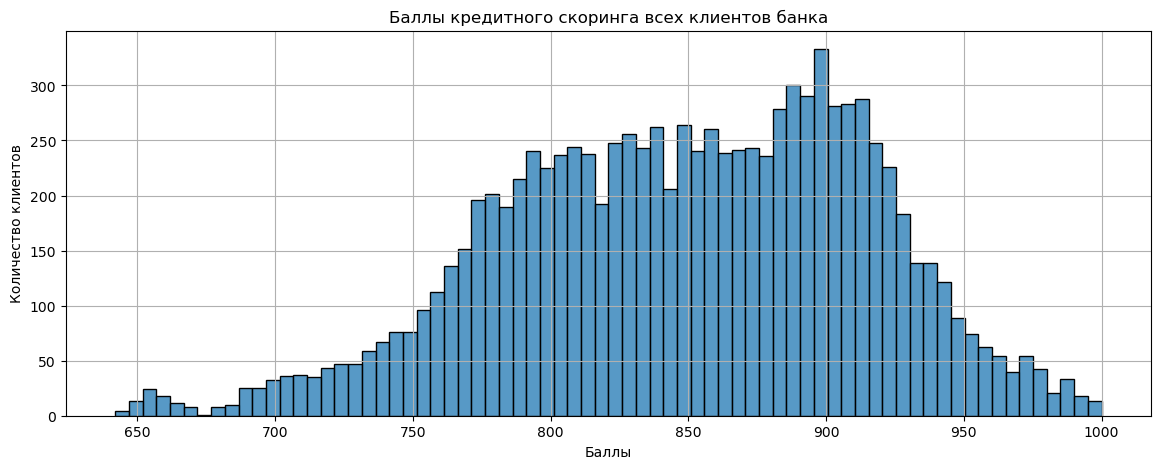

In [20]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="score", bins=72)
plt.title('Баллы кредитного скоринга всех клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы')
plt.grid()
plt.show()

- Отрадно видеть, что у клиентов банка как правило хороший кредитный скоринг.
- Пик по количеству клиентов приходится на 890-900 баллов.

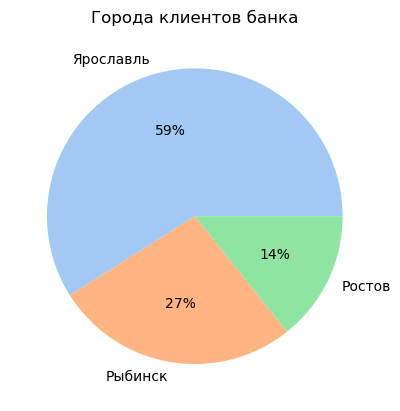

In [21]:
cities = data.groupby('city')['userid'].count().sort_values(ascending=False).reset_index()
cities.columns = ['город', 'количество клиентов']

plt.pie(cities['количество клиентов'], labels = cities['город'], colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title('Города клиентов банка')
plt.show()

- Больше половины клиентов как полагается из областного центра, Ярославля - 59%.
- Из Рыбинска 27% клиентов, из Ростова Великого - 14%.

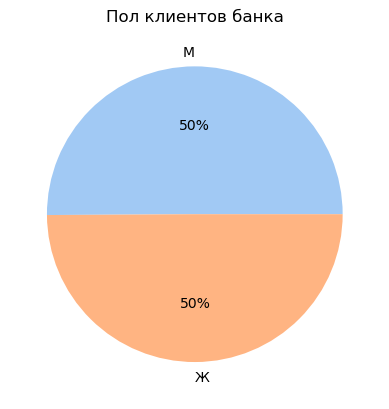

In [22]:
genders = data.groupby('gender')['userid'].count().sort_values(ascending=False).reset_index()
genders.columns = ['пол', 'количество клиентов']
plt.pie(genders['количество клиентов'], labels = genders['пол'], colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title('Пол клиентов банка')
plt.show()

- В распределении полов у нас равноправие - мужчин и женщин поровну.

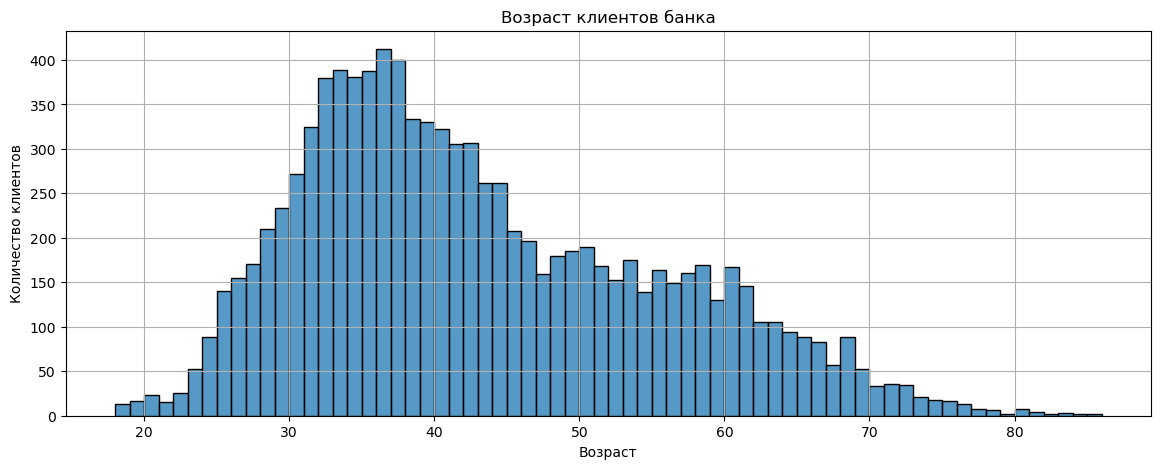

In [23]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="age", bins=(86-18))
plt.title('Возраст клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст')
plt.grid()
plt.show()

- Больше всего клиентов в возрасте от 30 до 45 лет.
- Клиентов в возрасте от 45 до 60 примерно равное распределение.

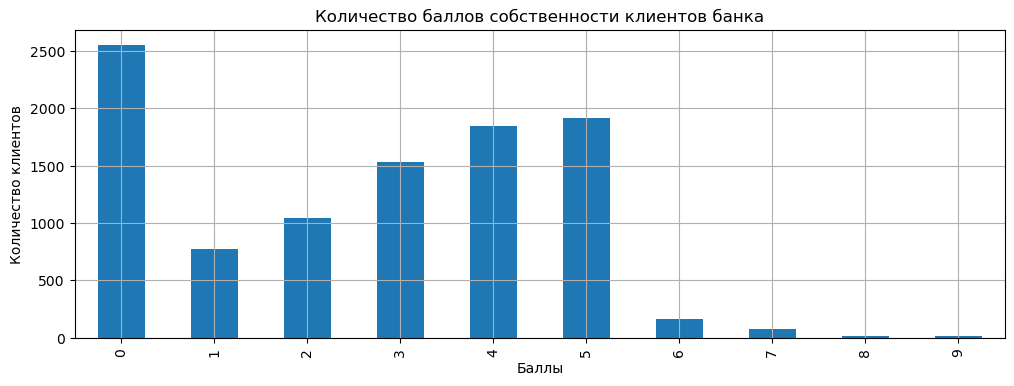

In [24]:
data['equity'].value_counts().sort_index().plot(kind='bar', figsize=(12, 4))
plt.title('Количество баллов собственности клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Баллы')
plt.grid()
plt.show()

- 2500 клиентов, а это четверть, не имеют баллов собственности.
- От 1 до 5 баллов количество клиентов увеличивается, а не наоборот, что удивительно.
- Больше 5-ти баллов есть мало у кого.

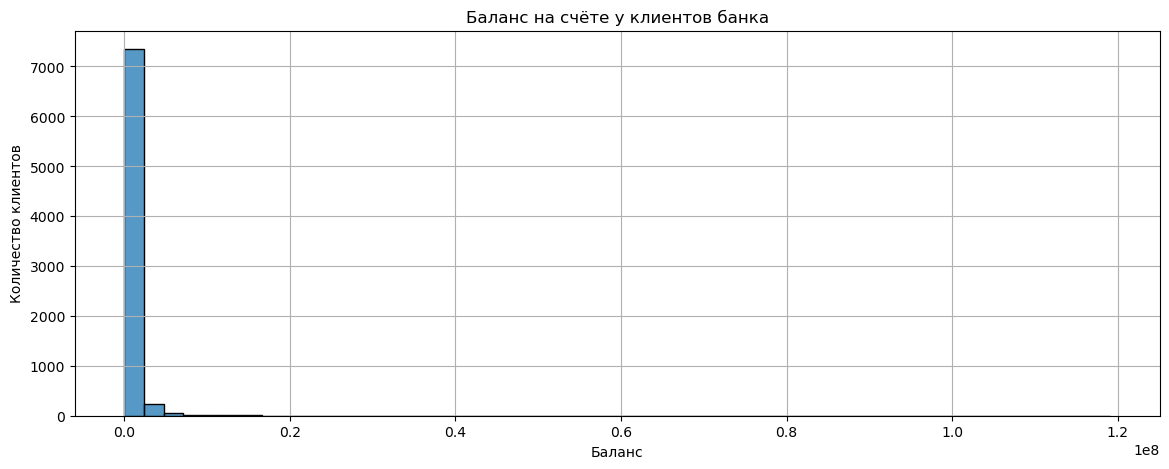

In [25]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="balance", bins=(50))
plt.title('Баланс на счёте у клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс')
plt.grid()
plt.show()

Визуализация неинформативна из-за довольно широкой линейки балансов. У нас 75% клиентов умещаются в 980 тысяч, посмотрим у скольких клиентов больше 5 миллионов на балансе.

In [26]:
data['balance'][data['balance'] > 5000000].count()

72

Думаю, для визуализации можно ими пожертвовать.

In [27]:
data_balance = data[data['balance'] <= 5000000]

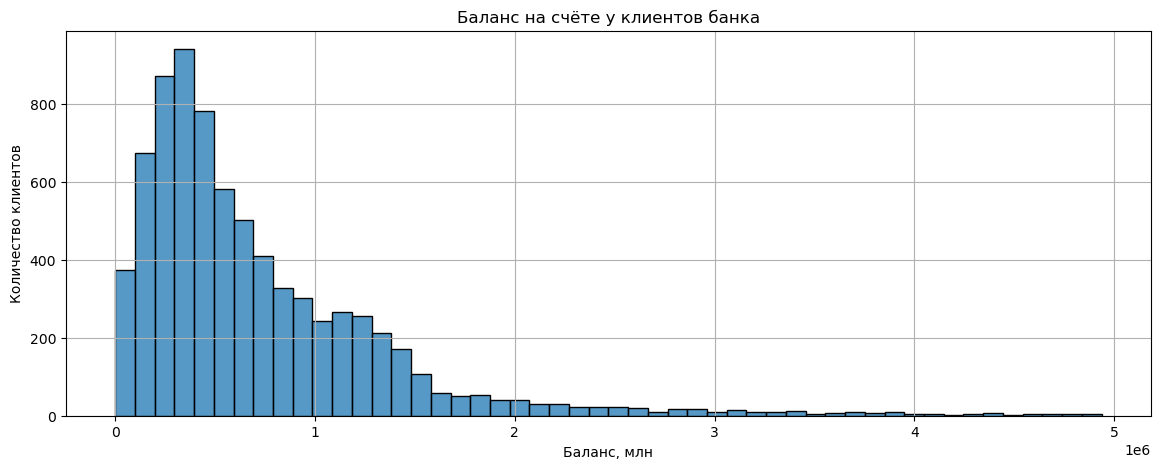

In [28]:
plt.figure(figsize=(14,5))
sns.histplot(data=data_balance, x="balance", bins=(50))
plt.title('Баланс на счёте у клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Баланс, млн')
plt.grid()
plt.show()

- Больше всего клиентов, у которых на счёте хранится от 300 до 400 тысяч рублей.

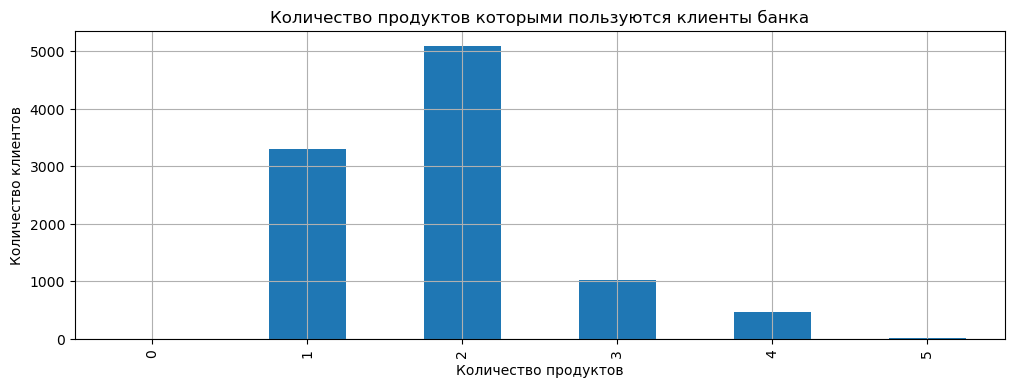

In [29]:
data['products'].value_counts().sort_index().plot(kind='bar', figsize=(12, 4))
plt.title('Количество продуктов которыми пользуются клиенты банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Количество продуктов')
plt.grid()
plt.show()

- 50% клиентов пользуются двумя продуктами банка. 30% пользуются только одним.

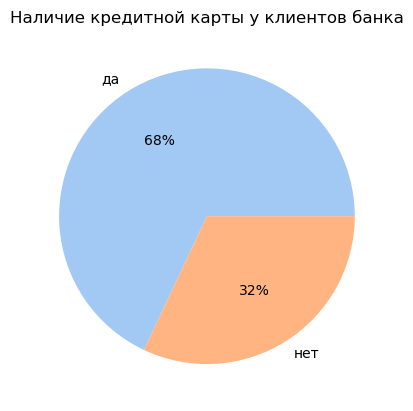

In [30]:
credit_cards = data.groupby('credit_card')['userid'].count().sort_values(ascending=False).reset_index()
credit_cards.columns = ['credit_card', 'count']

plt.pie(credit_cards['count'], labels = ['да', 'нет'], colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title('Наличие кредитной карты у клиентов банка')
plt.show()

- У 68% клиентов есть кредитная карта, у 32% нет.

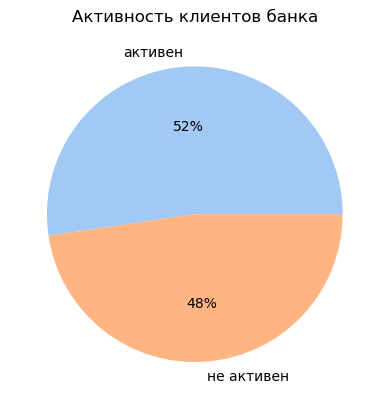

In [31]:
activity = data.groupby('last_activity')['userid'].count().sort_values(ascending=False).reset_index()
activity.columns = ['last_activity', 'count']

plt.pie(activity['count'], labels = ['активен', 'не активен'], colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title('Активность клиентов банка')
plt.show()

- Здесь мы видим, что 52% клиентов в последнее время проявляли какую-то активность по продуктам, остальные же являются спящими ячейками.

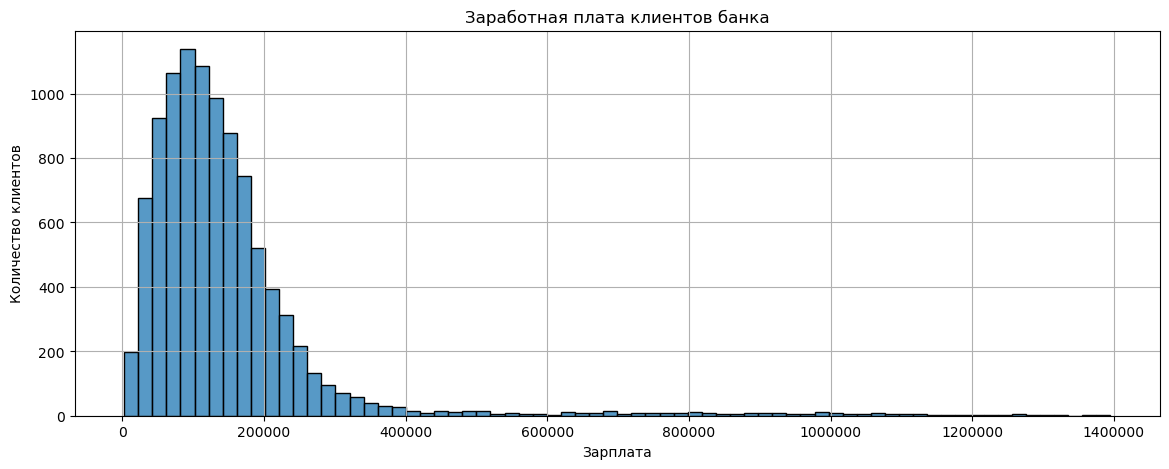

In [32]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="est_salary", bins=70)
plt.title('Заработная плата клиентов банка')
plt.ylabel('Количество клиентов')
plt.xlabel('Зарплата')
plt.ticklabel_format(useOffset=False, style='plain')
plt.grid()
plt.show()

- Заработная плата клиентов варьируется от 20 до 220 тысяч с пиком на 100 тысячах.

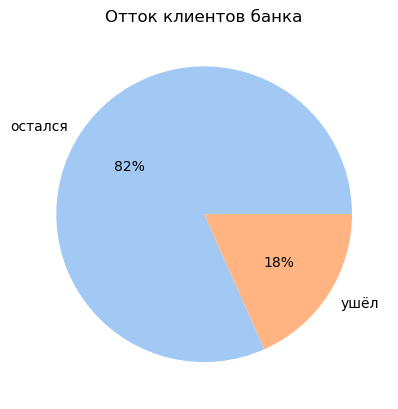

In [33]:
churn = data.groupby('churn')['userid'].count().sort_values(ascending=False).reset_index()
churn.columns = ['churn', 'count']

plt.pie(churn['count'], labels = ['остался', 'ушёл'], colors=sns.color_palette("pastel"), autopct='%.0f%%')
plt.title('Отток клиентов банка')
plt.show()

- Отточных клиентов 18% от всего количества.

#### Матрица корреляций

In [34]:
#создаём новый датафрейм без столбца userid
data_phik = data
data_phik = data_phik.drop(columns = ['userid'],axis = 1)

In [35]:
phik = data_phik[['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']].phik_matrix()
interval_cols = ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']
phik = data_phik.phik_matrix(interval_cols=interval_cols)

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


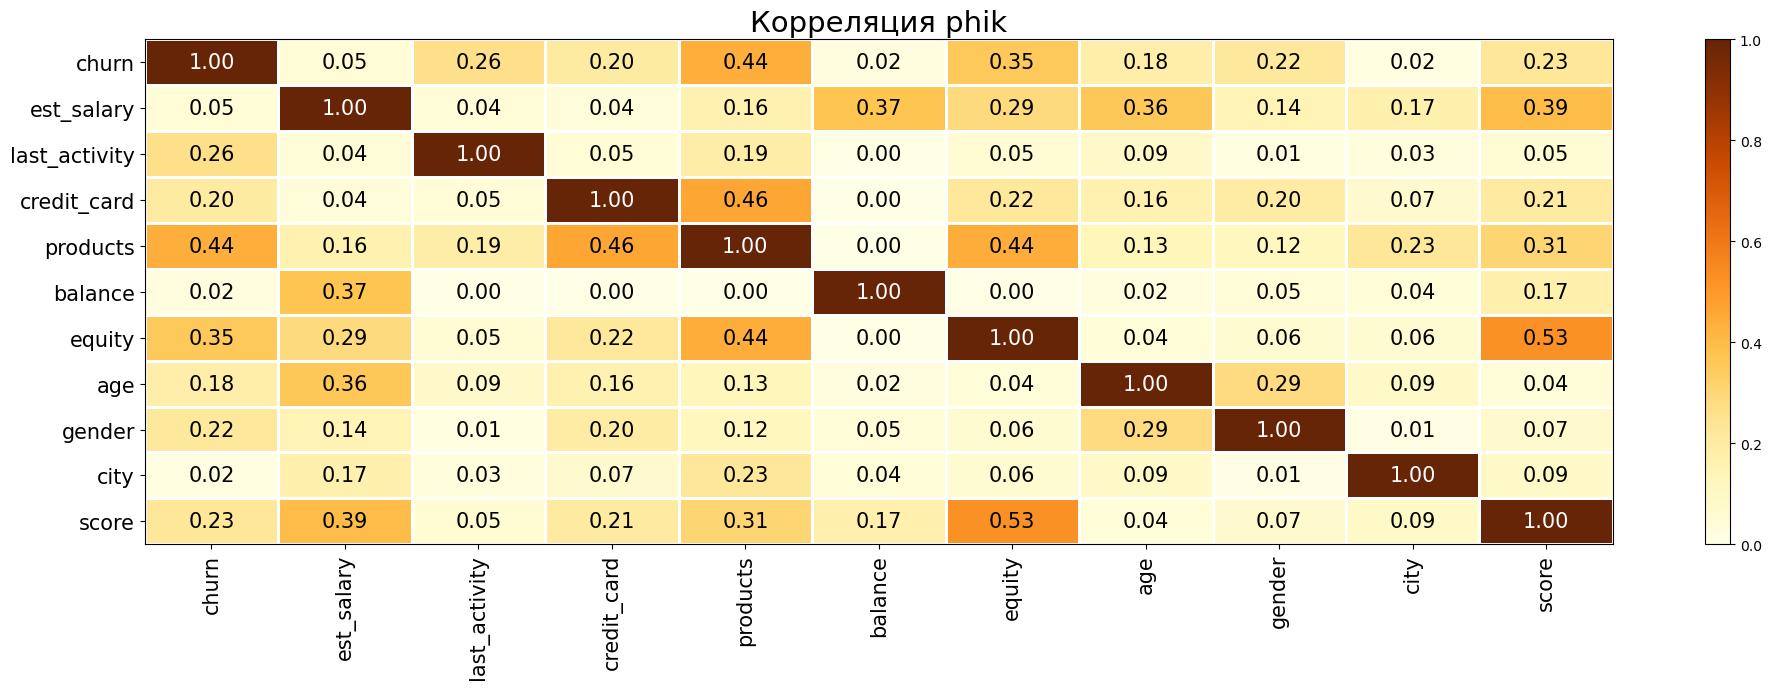

In [36]:
plot_correlation_matrix(phik.values, 
                        x_labels=phik.columns, 
                        y_labels=phik.index, 
                        vmin=0, vmax=1, color_map="YlOrBr", 
                        title="Корреляция phik", 
                        fontsize_factor=1.5, 
                        figsize=(20, 7))
plt.tight_layout()

- У оттока есть небольшая корреляция с количеством используемых продуктов и баллами собственности.

### 4.Анализ отточных клиентов и их сегментация

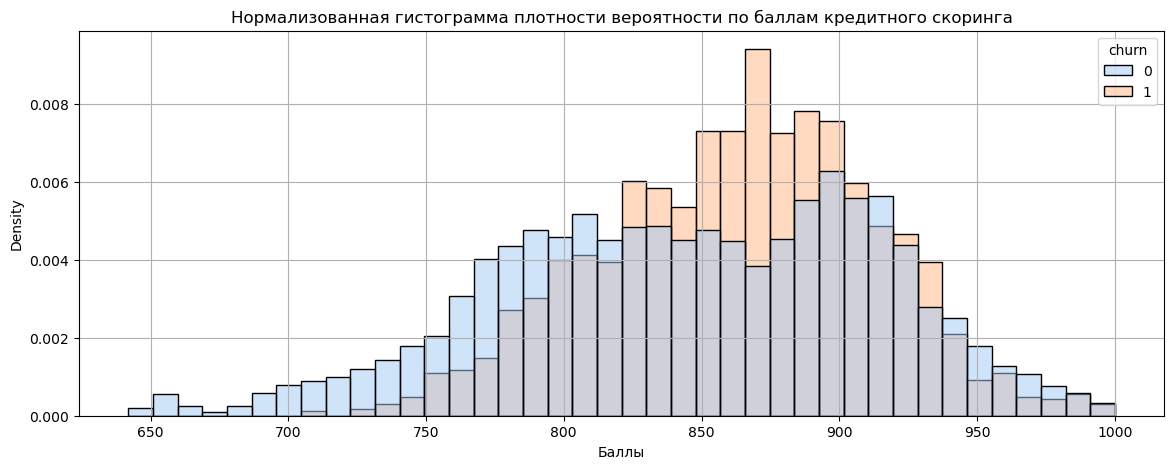

In [37]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="score", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по баллам кредитного скоринга')
plt.xlabel('Баллы')
plt.grid()
plt.show()

- Клиенты с 820-900 баллами склонны к оттоку.

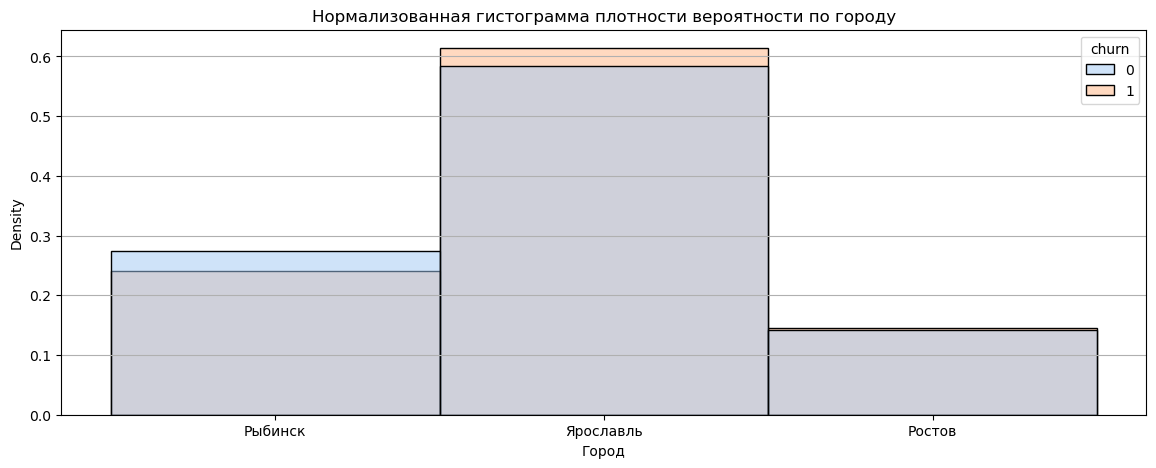

In [38]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="city", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по городу')
plt.xlabel('Город')
plt.grid(axis='y', linestyle='-')
plt.show()

- Клиенты из Ярославля незначительно, но всё же более склонны к оттоку чем клиенты из других городов.

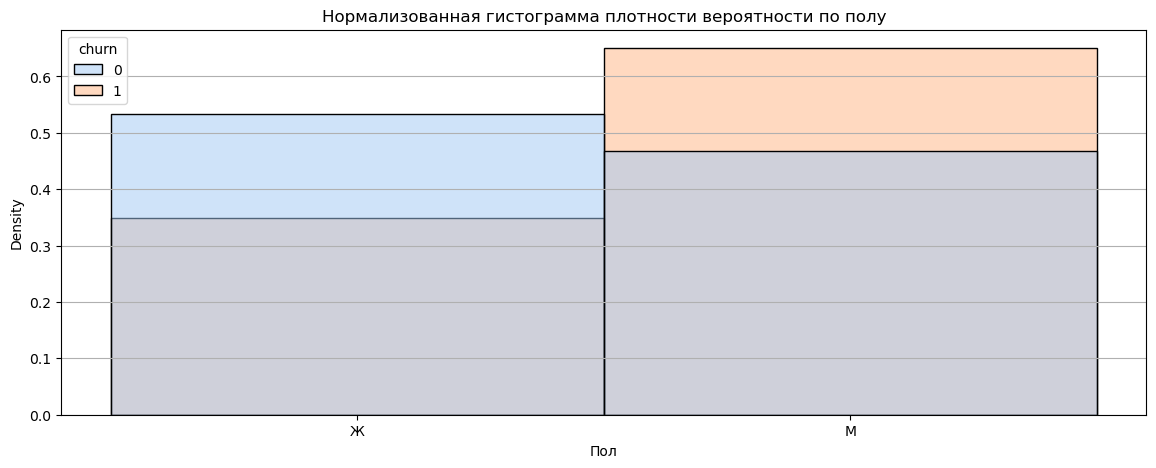

In [39]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="gender", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по полу')
plt.xlabel('Пол')
plt.grid(axis='y', linestyle='-')
plt.show()

- Мужчины более стремятся уйти нежели женщины.

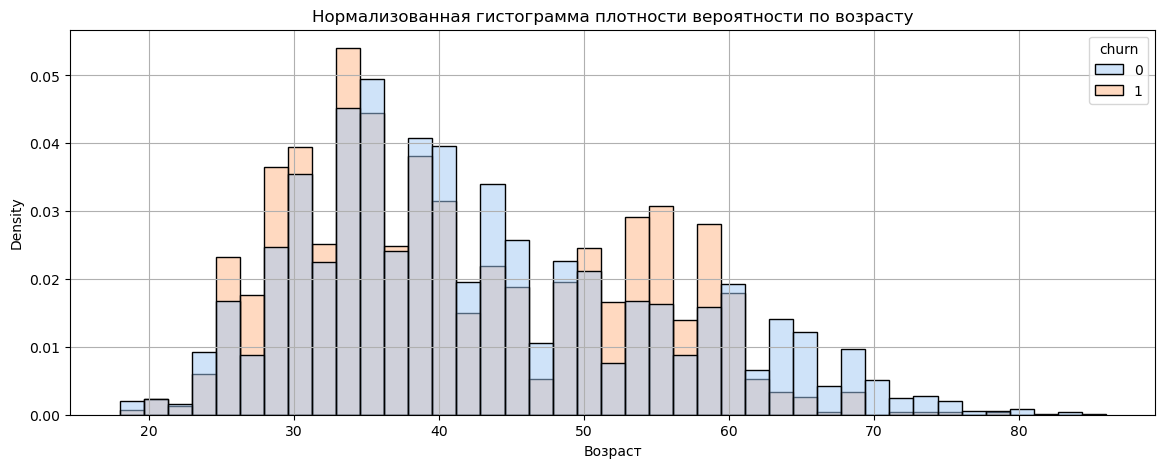

In [40]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="age", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по возрасту')
plt.xlabel('Возраст')
plt.grid()
plt.show()

- Здесь мы видим два отточных возрастных отрезка: 25-35 и 50-60.

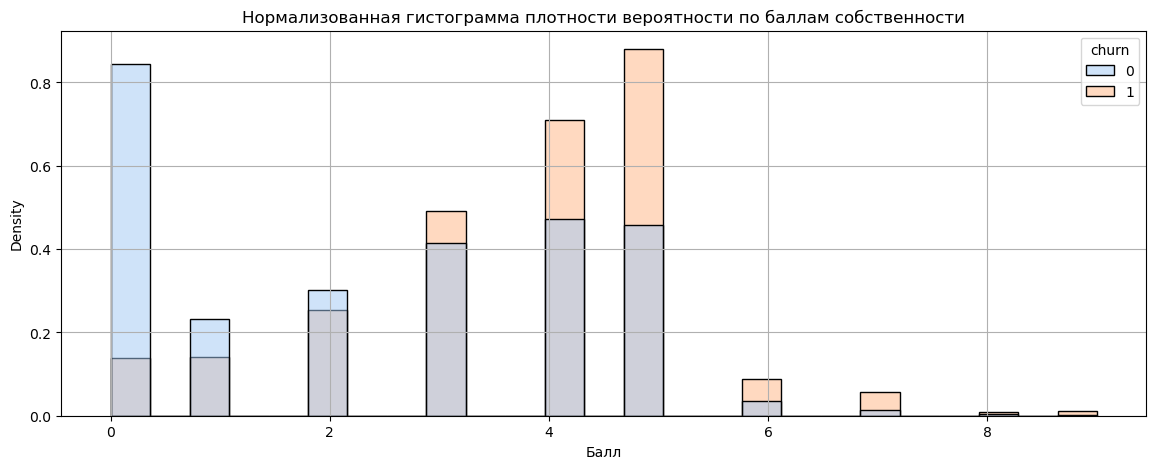

In [41]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="equity", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по баллам собственности')
plt.xlabel('Балл')
plt.grid()
plt.show()

- Клиенты с 3-7 баллами собственности более склонны к уходу.

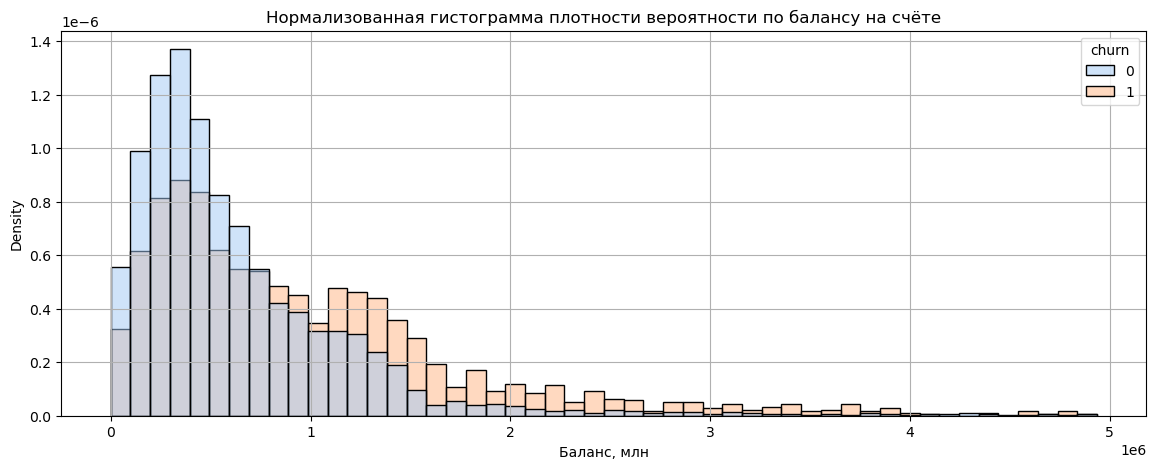

In [42]:
plt.figure(figsize=(14,5))
sns.histplot(data=data_balance, x="balance", hue="churn", stat="density", common_norm=False, palette="pastel", bins=(50))
plt.title('Нормализованная гистограмма плотности вероятности по балансу на счёте')
plt.xlabel('Баланс, млн')
plt.grid()
plt.show()

- Баланс от 800 тысяч - отточный сегмент.

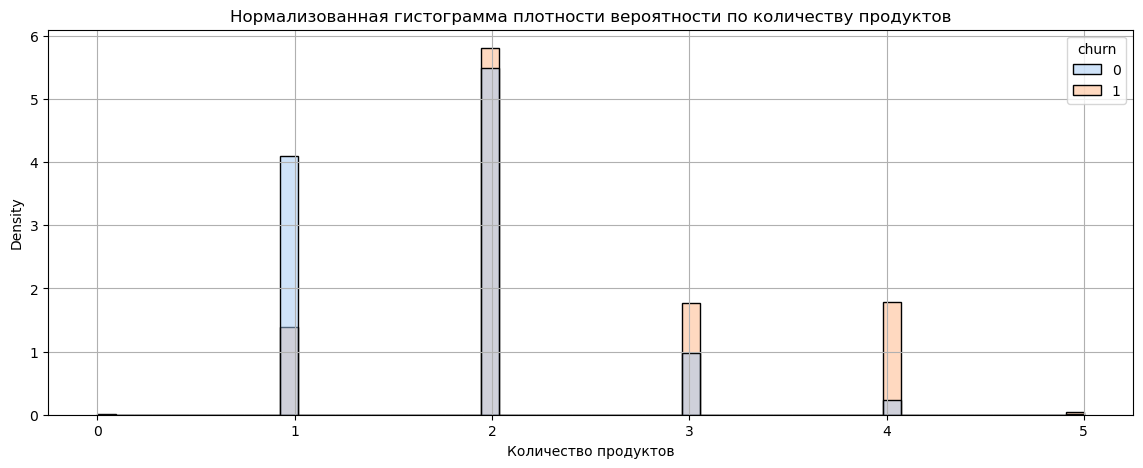

In [43]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="products", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по количеству продуктов')
plt.xlabel('Количество продуктов')
plt.grid()
plt.show()

- Клиенты, использующие от двух до четырёх продуктов более склонны к уходу.

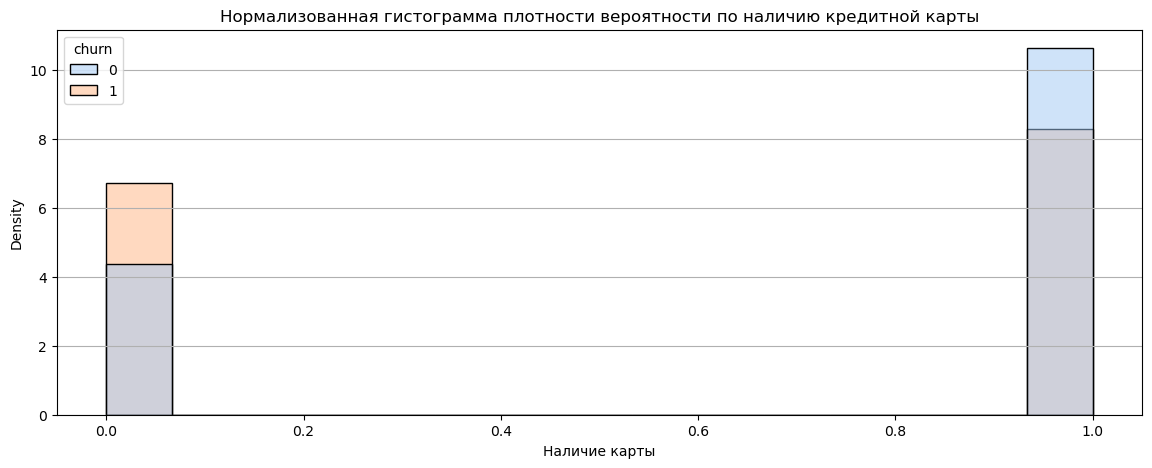

In [44]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="credit_card", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по наличию кредитной карты')
plt.xlabel('Наличие карты')
plt.grid(axis='y', linestyle='-')
plt.show()

- Уходят чаще клиенты не имеющие кредитную карту.

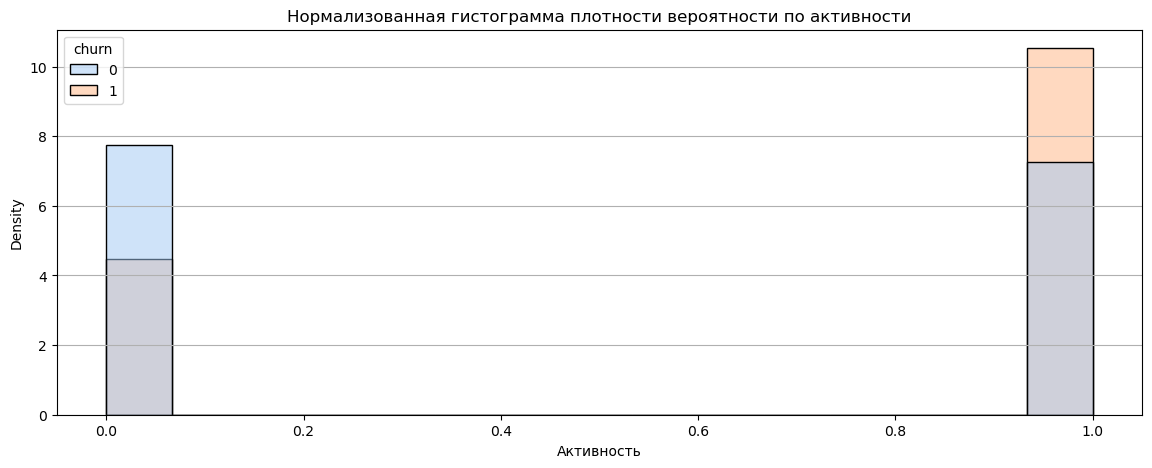

In [45]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="last_activity", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по активности')
plt.xlabel('Активность')
plt.grid(axis='y', linestyle='-')
plt.show()

- Удивительно, но активные клиенты более склонны к оттоку. Видимо активность побуждает их пробовать разные банки.

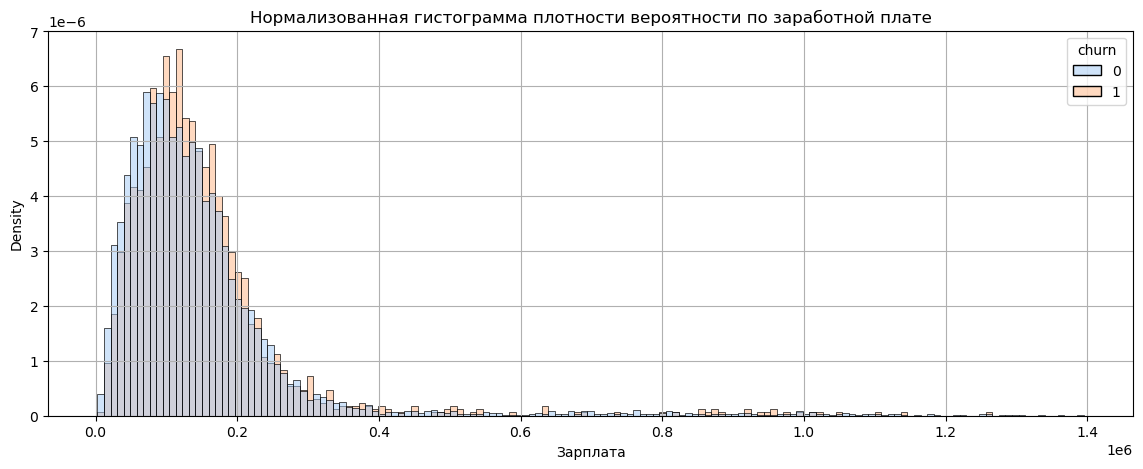

In [46]:
plt.figure(figsize=(14,5))
sns.histplot(data=data, x="est_salary", hue="churn", stat="density", common_norm=False, palette="pastel")
plt.title('Нормализованная гистограмма плотности вероятности по заработной плате')
plt.xlabel('Зарплата')
plt.grid()
plt.show()

- Уходят чаще клиенты с зарплатой от 100 до 210 тысяч.

По этому всему получается, что <br>
**портрет отточного клиента** таков:<br>
- Количество баллов кредитного скоринга: 820-900
- Город: Ярославль
- Пол: мужской
- Возраст: 25-35 или 50-60
- Количество баллов собственности: от 3-х до 7-ми
- Баланс: от 800 тысяч рублей
- Количество продуктов: от 2-х до 4-х
- Кредитной карты нет
- Проявляет активность
- Заработная плата: 100-210 тысяч

#### Сегментация клиентов по отточным признакам

Возьмём за основу признаки из портрета отточного клиента и посчитаем срезы с помощью query.<br>
*Внимание! Цикл ниже очень долго считается.* 

In [47]:
# создаём список с запросами в query на основе срезов из вывода выше
queries = [['city', "city=='Ярославль'"], 
           ['score',"score>=820 and score<=900"],  
           ['gender', "gender=='М'"],['age25', "age>=25 and age<=35"],  
           ['age50', "age>=50 and age<=60"], 
           ['equity', "equity>=3 and equity<=7"], 
           ['balance', "balance>=800000"], 
           ['products', "products>=2 and products<=4"], 
           ['credit_card', "credit_card==0"], 
           ['activity', "last_activity==1"], 
           ['salary', "est_salary>=100000 and est_salary<=210000"]]

# создаём новый датафрейм с нужными колонками
query_result = pd.DataFrame(columns=['комбинация', 'общее_число', 'число_отточных'])

# создаём цикл, который переплюсует все варианты срезов из списка в формате a+b+c+d, b+c+d+e, c+e+f+g ... и т.д.
# и запишет все расчёты в новый датафрейм
for q1 in queries:
    for q2 in queries:
        for q3 in queries:
            for q4 in queries:
                query_result.loc[len(query_result.index )] = [(q1[0] + '-' + q2[0] + '-' + q3[0] + '-' + q4[0]), (data.query(q1[1] + ' and ' + q2[1] + ' and ' + q3[1] + ' and ' + q4[1])['userid'].count()), (data.query (q1[1] + ' and ' + q2[1] + ' and ' + q3[1] + ' and ' + q4[1] + 'and churn==1')['userid'].count())]

In [48]:
query_result

,комбинация,общее_число,число_отточных
0,city-city-city-city,5854,1117
1,city-city-city-score,2399,642
2,city-city-city-gender,2985,710
3,city-city-city-age25,1904,442
4,city-city-city-age50,955,262
...,...,...,...
14636,salary-salary-salary-balance,1285,514
14637,salary-salary-salary-products,2933,814
14638,salary-salary-salary-credit_card,1444,431
14639,salary-salary-salary-activity,2328,669


Теперь у нас есть датафрейм со всеми возможными комбинациями срезов из четырёх условий.<br>
Там будет много дубликатов потому что много перемен мест слагаемых.

In [49]:
query_result[query_result.duplicated(['общее_число', 'число_отточных'])]

,комбинация,общее_число,число_отточных
11,city-city-score-city,2399,642
12,city-city-score-score,2399,642
22,city-city-gender-city,2985,710
23,city-city-gender-score,1180,391
24,city-city-gender-gender,2985,710
...,...,...,...
14635,salary-salary-salary-equity,2451,745
14636,salary-salary-salary-balance,1285,514
14637,salary-salary-salary-products,2933,814
14638,salary-salary-salary-credit_card,1444,431


Удаляем все дубликаты по двум числовым столбцам.

In [50]:
query_result = query_result.drop_duplicates(subset=['общее_число', 'число_отточных'])

Добавляем новый столбец с долей отточных.

In [51]:
query_result['доля_отточных'] = query_result['число_отточных'] / query_result['общее_число'] * 100

Отфильтруем по общему числу клиентов от 1000 и отсортируем по доле отточных.

In [52]:
query_result[query_result['общее_число'] > 1000].sort_values(by='доля_отточных', ascending=False).head(20)

,комбинация,общее_число,число_отточных,доля_отточных
7467,equity-balance-products-activity,1063,555,52.21
8798,balance-balance-products-activity,1165,592,50.82
7335,equity-equity-balance-activity,1198,601,50.17
3340,gender-equity-balance-products,1012,503,49.70
8787,balance-balance-balance-activity,1316,643,48.86
2977,gender-gender-balance-products,1110,538,48.47
3353,gender-equity-products-activity,1154,557,48.27
7611,equity-products-activity-salary,1047,491,46.90
2965,gender-gender-equity-balance,1174,548,46.68
2022,score-equity-products-activity,1255,584,46.53


Получились следующие сегменты:

**Сегмент 1**<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Баланс: от 800 тысяч рублей<br>
Количество продуктов: от 2-х до 4-х<br>
Проявляет активность<br><br>
Общее число клиентов: **1063**<br>
Число отточных клиентов: **555**<br>
Доля отточных клиентов: **52.21%**

**Сегмент 2**<br>
Пол: мужской<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Баланс: от 800 тысяч рублей<br>
Количество продуктов: от 2-х до 4-х<br><br>
Общее число клиентов: **1012**<br>
Число отточных клиентов: **503**<br>
Доля отточных клиентов: **49.70%**

**Сегмент 3**<br>
Пол: мужской<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Количество продуктов: от 2-х до 4-х<br>
Проявляет активность<br><br>
Общее число клиентов: **1154**<br>
Число отточных клиентов: **557**<br>
Доля отточных клиентов: **48.27%**

**Сегмент 4**<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Количество продуктов: от 2-х до 4-х<br>
Проявляет активность<br>
Заработная плата: 100-210 тысяч<br><br>
Общее число клиентов: **1047**<br>
Число отточных клиентов: **491**<br>
Доля отточных клиентов: **46.90%**

**Сегмент 5**<br>
Количество баллов кредитного скоринга: 820-900<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Количество продуктов: от 2-х до 4-х<br>
Проявляет активность<br><br>
Общее число клиентов: **1255**<br>
Число отточных клиентов: **584**<br>
Доля отточных клиентов: **46.53%**

**Сегмент 6**<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Количество продуктов: от 2-х до 4-х<br>
Кредитной карты нет<br>
Проявляет активность<br><br>
Общее число клиентов: **1151**<br>
Число отточных клиентов: **530**<br>
Доля отточных клиентов: **46.05%**

**Сегмент 7**<br>
Количество баллов собственности: от 3-х до 7-ми<br>
Баланс: от 800 тысяч рублей<br>
Количество продуктов: от 2-х до 4-х<br>
Кредитной карты нет<br><br>
Общее число клиентов: **1027**<br>
Число отточных клиентов: **450**<br>
Доля отточных клиентов: **43.82%**

### 5. Проверка гипотез

**Гипотеза №1: различие дохода между теми клиентами, которые ушли и теми, которые остались.**<br><br>
Сформулируем нулевую и альтернативную гипотезы:<br>
H₀: средние доходы оставшихся и отточных клиентов равны.<br>
H₁: средние доходы оставшихся и отточных клиентов не равны.

In [53]:
results = st.ttest_ind (
    data[data['churn']==0]['est_salary'],
    data[data['churn']==1]['est_salary'], equal_var = False)

alpha = 0.05

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

0.8788704288244973
Не получилось отвергнуть нулевую гипотезу


Проведённый тест показал, что нулевую гипотезу об отсутствии различий в доходах отточных и оставшихся клиентов опровергнуть не удалось.

**Гипотеза №2: различие возраста между теми клиентами, которые ушли и теми, которые остались.**<br><br>
Сформулируем нулевую и альтернативную гипотезы:<br>
H₀: средний возраст оставшихся и отточных клиентов равен.<br>
H₁: средний возраст оставшихся и отточных клиентов не равен.

In [54]:
results = st.ttest_ind (
    data[data['churn']==0]['age'],
    data[data['churn']==1]['age'], equal_var = False)

alpha = 0.05

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.308603911905897e-07
Отвергаем нулевую гипотезу


Проведённый тест показал, что нулевую гипотезу об отсутствии различий в возрасте отточных и оставшихся клиентов следует опровергнуть.

**Гипотеза №3: различие баллов собственности между теми клиентами, которые ушли и теми, которые остались.**<br><br>
Сформулируем нулевую и альтернативную гипотезы:<br>
H₀: средние баллы собственности оставшихся и отточных клиентов равны.<br>
H₁: средние баллы собственности оставшихся и отточных клиентов не равны.

In [55]:
results = st.ttest_ind (
    data[data['churn']==0]['equity'],
    data[data['churn']==1]['equity'], equal_var = False)

alpha = 0.05

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

1.6462522021205073e-195
Отвергаем нулевую гипотезу


Проведённый тест показал, что нулевую гипотезу об отсутствии различий в баллах собственности отточных и оставшихся клиентов следует опровергнуть.

**Гипотеза №4: различие количества используемых продуктов между теми клиентами, которые ушли и теми, которые остались.**<br><br>
Сформулируем нулевую и альтернативную гипотезы:<br>
H₀: среднее количество используемых продуктов оставшихся и отточных клиентов равно.<br>
H₁: среднее количество используемых продуктов оставшихся и отточных клиентов не равно.

In [56]:
results = st.ttest_ind (
    data[data['churn']==0]['products'],
    data[data['churn']==1]['products'], equal_var = False)

alpha = 0.05

print (results.pvalue)

if results.pvalue < alpha:
    print ('Отвергаем нулевую гипотезу')
else:
    print ('Не получилось отвергнуть нулевую гипотезу')

5.60241330870758e-138
Отвергаем нулевую гипотезу


Проведённый тест показал, что нулевая гипотеза об отсутствии различий в количестве используемых банковских продуктов, должна быть опровергнута.

### 6. Выводы и рекомендации

#### Выводы

Проведенное исследование показало, что некоторые параметры больше других оказывают влияние на отток клиентов из банка.<br>
К параметрам, влияющим на отток, относятся:
- Количество баллов кредитного скоринга
- Город
- Пол
- Количество баллов собственности
- Количество продуктов
- Наличие кредитной карты
- Активность

Был составлен следующий портрет отточного клиента:
- Количество баллов кредитного скоринга: 820-900
- Город: Ярославль
- Пол: мужской
- Возраст: 25-35 или 50-60
- Количество баллов собственности: от 3-х до 7-ми
- Баланс: от 800 тысяч рублей
- Количество продуктов: от 2-х до 4-х
- Кредитной карты нет
- Проявляет активность
- Заработная плата: 100-210 тысяч

Был проведен статистический анализ следующих гипотез:
- Гипотеза №1: различие дохода между теми клиентами, которые ушли и теми, которые остались: не подтвердилась
- Гипотеза №2: различие возраста между теми клиентами, которые ушли и теми, которые остались: подтвердилась
- Гипотеза №3: различие баллов собственности между теми клиентами, которые ушли и теми, которые остались: подтвердилась
- Гипотеза №4: различие количества используемых продуктов между теми клиентами, которые ушли и теми, которые остались: подтвердилась

#### Рекомендации
Обратить внимание на клиентов с высоким баллом кредитного скоринга, особенно на тех, у кого нет кредитной карты - как вариант: предложить льготные условия по кредитам.<br>
Внимательнее изучить ситуацию в Ярославле, возможно запустить какие-то специальные предложения.<br> 
Сделать акцент на мужскую аудиторию 50-60 лет: например предложить повышенный кэшбэк на товары для дачи, автомобилей, спорта или рыбалки. Для аудитории 25-35 лет на товары для дома, электронику или кафе/рестораны.<br>
Для клиентов с высокими баллами собственности можно предложить специальные условия по страхованию недвижимости и транспортных средств.<br>
Пересмотреть предложения по кредитным картам или запустить новые, опираясь на вышеописанный портрет отточного клиента.<br>
Удовлетворить интерес активных клиентов социальными сетями или, например, новым мобильным приложением.

[Дашборд](https://public.tableau.com/app/profile/artem.kontarev/viz/Bank_Metanprom_Dashboard/Dashboard) <br>
[Презентация](https://disk.yandex.ru/i/f6IpMj3WETnSkA)